<a href="https://colab.research.google.com/github/r42arty/hse/blob/main/homework_practice_01_pandas_%D0%9C%D0%B0%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D0%B0_%D0%9A%D1%80%D0%B8%D1%81%D1%82%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Практическое домашнее задание 1 </center>

*`credits to ML course by E. Sokolov`*

### Общая информация

Дата выдачи: 01.02.2025

Первый дедлайн: 07:59MSK 20.02.2025

Второй дедлайн: 07:59MSK 24.02.2025

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки `pandas` и визуализации с помощью `matplotlib`. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи).

**Штраф за каждый день просрочки мягкого дедлайна**: 0.5 баллов. После жесткого дедлайна работы не принимаются.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник.

### Формат сдачи
Задания сдаются через гугл-форму https://forms.gle/pT6CtSPNRXoqd64d6. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода.

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*.

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [ ]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [ ]:
# your code
5+8

13

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб?

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [ ]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Скачаем подготовленные данные командой ниже:

In [ ]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

**В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.**

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

In [ ]:
# your code - прежде чем открывать файл, я его скачала и перевела в формат csv, заново загрузила в гугл коллаб
import pandas as pd
df = pd.read_excel('/content/end_seminar.xlsx')
print(df.tail(10))

                  timestamp                                id  rating  \
351 2020-05-18 23:58:33.903  8fe79f84f36e3a5d2d6745621321302c    1016   
352 2020-05-18 23:59:20.831  f93afd8e92c336b471aa3bbbc579aefe    1298   
353 2020-05-18 23:59:28.998  9963fc00d9405a35b894cc04a7e19855    1135   
354 2020-05-19 08:55:39.509  98c5a2548d93f26bd4195466e93178b3    1035   
355 2020-05-19 18:58:06.283  ba298cbd9be59b84bab33325e956f27e    1155   
356 2020-05-19 19:04:17.873  c5870b37ee3f672e4259dfb2fc02ed8f    1029   
357 2020-05-19 20:19:25.815  f44aea1095f9f5b8e2f5f0ed2b17891b    1060   
358 2020-05-20 11:54:38.318  d7118b44c7e8fdbbaaca226d2da6fef1    1111   
359 2020-05-23 21:16:40.916  79d14db48e4737af731960ae212d5134     966   
360 2020-05-23 21:16:40.916  f2d210ace25a841e1e58036b257d5d47    1195   

     18_group  is_mi                                           fall_1  \
351       NaN    NaN                 Безопасность компьютерных систем   
352       NaN    NaN                Высокопроизвод

#### 2. [1 балл] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [ ]:
# your code
print(df.isna())

     timestamp     id  rating  18_group  is_mi  fall_1  fall_2  fall_3  \
0        False  False   False     False   True   False   False   False   
1        False  False   False     False   True   False   False   False   
2        False  False   False     False   True   False   False   False   
3        False  False   False     False   True   False   False   False   
4        False  False   False     False   True   False   False   False   
..         ...    ...     ...       ...    ...     ...     ...     ...   
356      False  False   False      True   True   False   False   False   
357      False  False   False      True   True   False   False   False   
358      False  False   False      True   True   False   False   False   
359      False  False   False      True   True   False   False   False   
360      False  False   False      True   True   False   False   False   

     spring_1  spring_2  spring_3  is_first_time  percentile  17_group  \
0       False     False     False    

In [ ]:
df.isna().sum()

,0
timestamp,0
id,0
rating,0
18_group,138
is_mi,343
fall_1,0
fall_2,0
fall_3,0
spring_1,0
spring_2,0


In [ ]:
df1 = df.isna().sum()
df1_columns = df1[df1 > 0]

print("\Пропуски в данных:")
if df1.empty:
    print("В данных отсутствуют пропуски")
else:
    print(df1)

\Пропуски в данных:
timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [ ]:
import pandas as pd
df = pd.read_excel('/content/end_seminar.xlsx')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('')
    else:
        df[col] = df[col].fillna(0)

print(df.tail(10))

                  timestamp                                id  rating  \
351 2020-05-18 23:58:33.903  8fe79f84f36e3a5d2d6745621321302c    1016   
352 2020-05-18 23:59:20.831  f93afd8e92c336b471aa3bbbc579aefe    1298   
353 2020-05-18 23:59:28.998  9963fc00d9405a35b894cc04a7e19855    1135   
354 2020-05-19 08:55:39.509  98c5a2548d93f26bd4195466e93178b3    1035   
355 2020-05-19 18:58:06.283  ba298cbd9be59b84bab33325e956f27e    1155   
356 2020-05-19 19:04:17.873  c5870b37ee3f672e4259dfb2fc02ed8f    1029   
357 2020-05-19 20:19:25.815  f44aea1095f9f5b8e2f5f0ed2b17891b    1060   
358 2020-05-20 11:54:38.318  d7118b44c7e8fdbbaaca226d2da6fef1    1111   
359 2020-05-23 21:16:40.916  79d14db48e4737af731960ae212d5134     966   
360 2020-05-23 21:16:40.916  f2d210ace25a841e1e58036b257d5d47    1195   

     18_group  is_mi                                           fall_1  \
351       0.0    0.0                 Безопасность компьютерных систем   
352       0.0    0.0                Высокопроизвод

In [ ]:
# your code

#### 3. [1 балл] Посмотрите повнимательнее на колонку 'is_first_time'.

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [ ]:
# your code

no = len(df[df['is_first_time'] == "Нет"])
print(no)

data_sort = df.sort_values('timestamp')
data_un = data_sort.drop_duplicates(subset='id', keep='last')
no_count = len(data_un[data_un['is_first_time'] == "Нет"])
print("Количество 'Нет' после удаления повторов:", no_count)

51
Количество 'Нет' после удаления повторов: 51


In [ ]:
# перезапись данных без повторов
df = data_un
print(df.head())

                  timestamp                                id  rating  \
223 2020-05-14 20:23:21.662  d555d2805e1d93d4f023e57dc4c8f403     996   
224 2020-05-14 20:47:13.833  253bbe1a2021d0404712a1e4acd22939    1106   
225 2020-05-14 20:52:42.734  881b1a6fda195b354ae2edb396a69f5d    1084   
226 2020-05-14 21:03:02.916  5a9b8ac11ad05b39a58b0e04a263bf4c    1170   
227 2020-05-14 21:10:54.945  1bbbfae51794b83c769b634be8da7b8d    1078   

     18_group  is_mi                                fall_1  \
223       0.0    0.0      Безопасность компьютерных систем   
224       0.0    0.0      Безопасность компьютерных систем   
225       0.0    0.0      Безопасность компьютерных систем   
226       0.0    0.0  Глубинное обучение в обработке звука   
227       0.0    0.0      Безопасность компьютерных систем   

                                   fall_2  \
223  Глубинное обучение в обработке звука   
224         Моделирование временных рядов   
225     Анализ неструктурированных данных   
226     

#### 4. [1 балл] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [ ]:
g17 = df['17_group'].count()
g18 = df['18_group'].count()

print(f"17-я группа: {g17}")
print(f"18-я группа: {g18}")

dups = df['percentile'].duplicated().sum()

print(f"\nДубликаты в percentile: {dups > 0}")

17-я группа: 138
18-я группа: 223

Дубликаты в percentile: True


#### 5. [1 балл] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)?

In [ ]:

print("Blended-курсы:\n", df['blended'].dropna().unique())

pop_course = df['blended'].mode()[0]
pop_count = df['blended'].value_counts().max()
print(f"\nСамый популярный курс: {pop_course}")
print(f"Студентов: {pop_count}")

top_b = df.groupby('blended')['rating'].mean().dropna().idxmax()
top_b_value = df.groupby('blended')['rating'].mean().dropna().max()
top_b_students = df[df['blended'] == top_rating].shape[0]

print(f"\nКурс с самым высоким средним рейтингом: {top_b}")
print(f"Средний рейтинг: {round(top_b_value, 2)}")
print(f"Студентов: {top_b_students}")


Blended-курсы:
 ['DevOps' 'Соревновательный анализ данных'
 'Введение в дифференциальную геометрию']

Самый популярный курс: DevOps
Студентов: 91

Курс с самым высоким средним рейтингом: Введение в дифференциальную геометрию
Средний рейтинг: 1210.73
Студентов: 15


#### 6. [1.5 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [ ]:
# your code

import pandas as pd
from IPython.display import display

df = df.copy()

df['blended'] = df['blended'].fillna('Нет')

dup_courses = df.groupby(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']).size()

dup_courses = dup_courses[dup_courses > 1].reset_index(name='count')

display(dup_courses)


,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,count
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2
1,Байесовские методы машинного обучения,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,DevOps,2
2,Байесовские методы машинного обучения,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,DevOps,2
3,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,,3
4,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,DevOps,2
5,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,,3
6,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,,2
7,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,,2
8,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,,2
9,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,,2


#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [ ]:
cols = ['fall_1', 'fall_2', 'spring_1', 'spring_2']

c18 = set(df[df['18_group'].notna()][cols].values.flatten())
c17 = set(df[df['17_group'].notna()][cols].values.flatten())

common = c18 & c17

print("Курсы, которые выбрали студенты обоих годов:", common)


Курсы, которые выбрали студенты обоих годов: {'Высокопроизводительные вычисления', 'Принятие решений в условиях риска и неопределённости', 'Сбор и обработка данных с помощью краудсорсинга', 'Statistical Learning Theory', 'Безопасность компьютерных систем', 'Численные методы', 'Моделирование временных рядов'}


Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [ ]:
# your code

only_17 = sorted(c17 - c18)
only_18 = sorted(c18 - c17)

print("\nКурсы, которые выбрали только студенты 17-го года:", only_17)
print("\nКурсы, которые выбрали только студенты 18-го года:", only_18)



Курсы, которые выбрали только студенты 17-го года: ['Анализ неструктурированных данных', 'Байесовские методы машинного обучения', 'Генеративные модели в машинном обучении', 'Глубинное обучение в обработке звука', 'Компьютерное зрение', 'Конфликты и кооперация', 'Методы сжатия и передачи медиаданных', 'Обучение с подкреплением', 'Проектирование и разработка высоконагруженных сервисов', 'Символьные вычисления']

Курсы, которые выбрали только студенты 18-го года: ['Анализ данных в бизнесе', 'Дискретная оптимизация', 'Дополнительные главы прикладной статистики', 'Компьютерные сети', 'Матричные вычисления', 'Машинное обучение 2', 'Промышленное программирование на языке Java', 'Системы баз данных', 'Теория баз данных', 'Язык SQL']


### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# your code

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')


#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

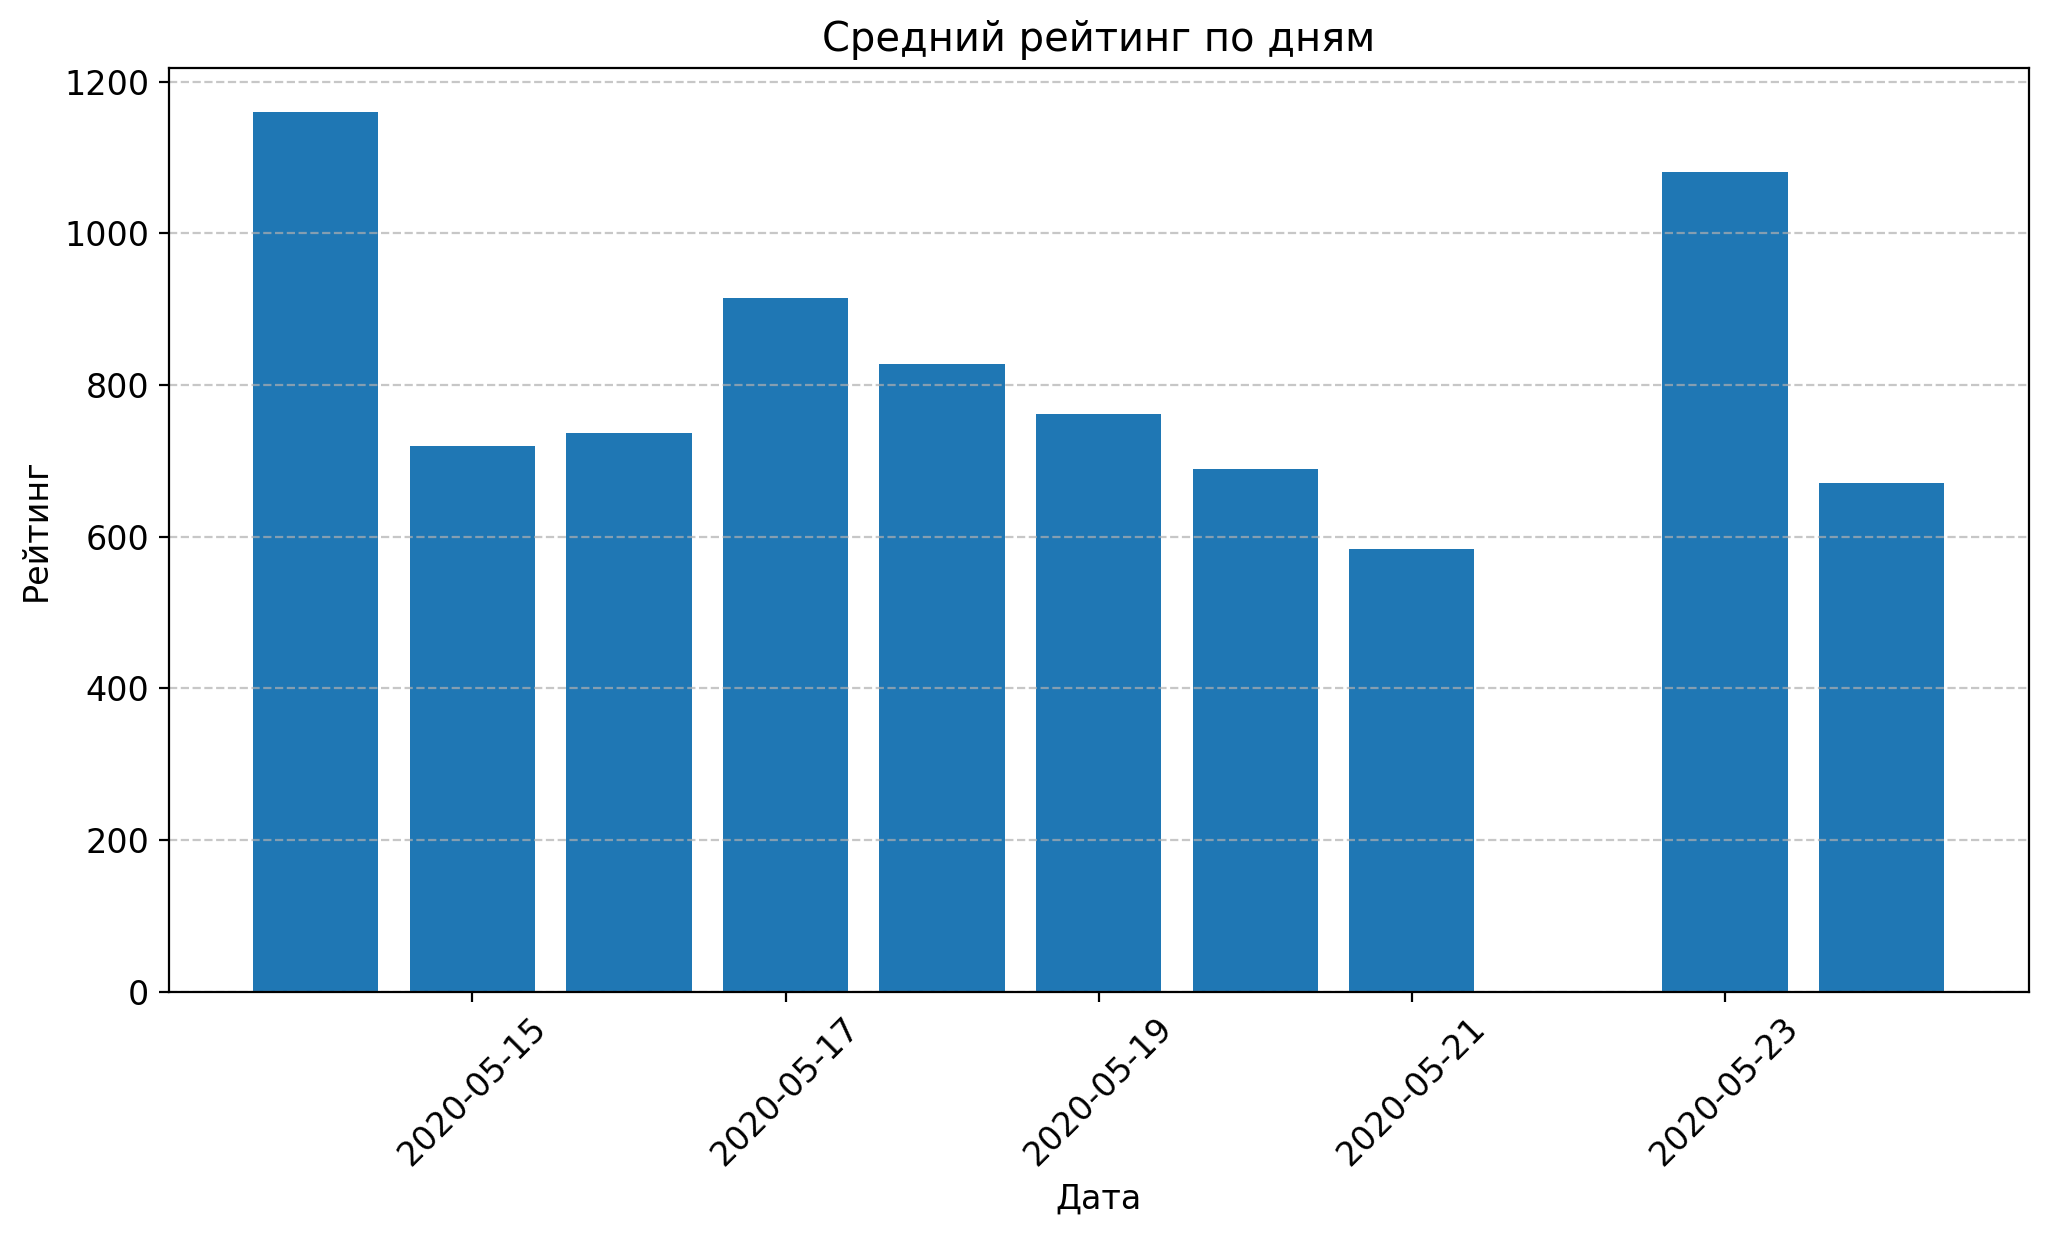

In [ ]:
# your code

import matplotlib.pyplot as plt

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['date'] = df['timestamp'].dt.date

avg_rating = df.groupby('date')['rating'].mean()

plt.figure(figsize=(12, 6))
plt.bar(avg_rating.index, avg_rating.values)
plt.xlabel('Дата')
plt.ylabel('Рейтинг')
plt.title('Средний рейтинг по дням')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Сохраните график в формате pdf (так он останется векторизованным).

'/mnt/data/rating.pdf'

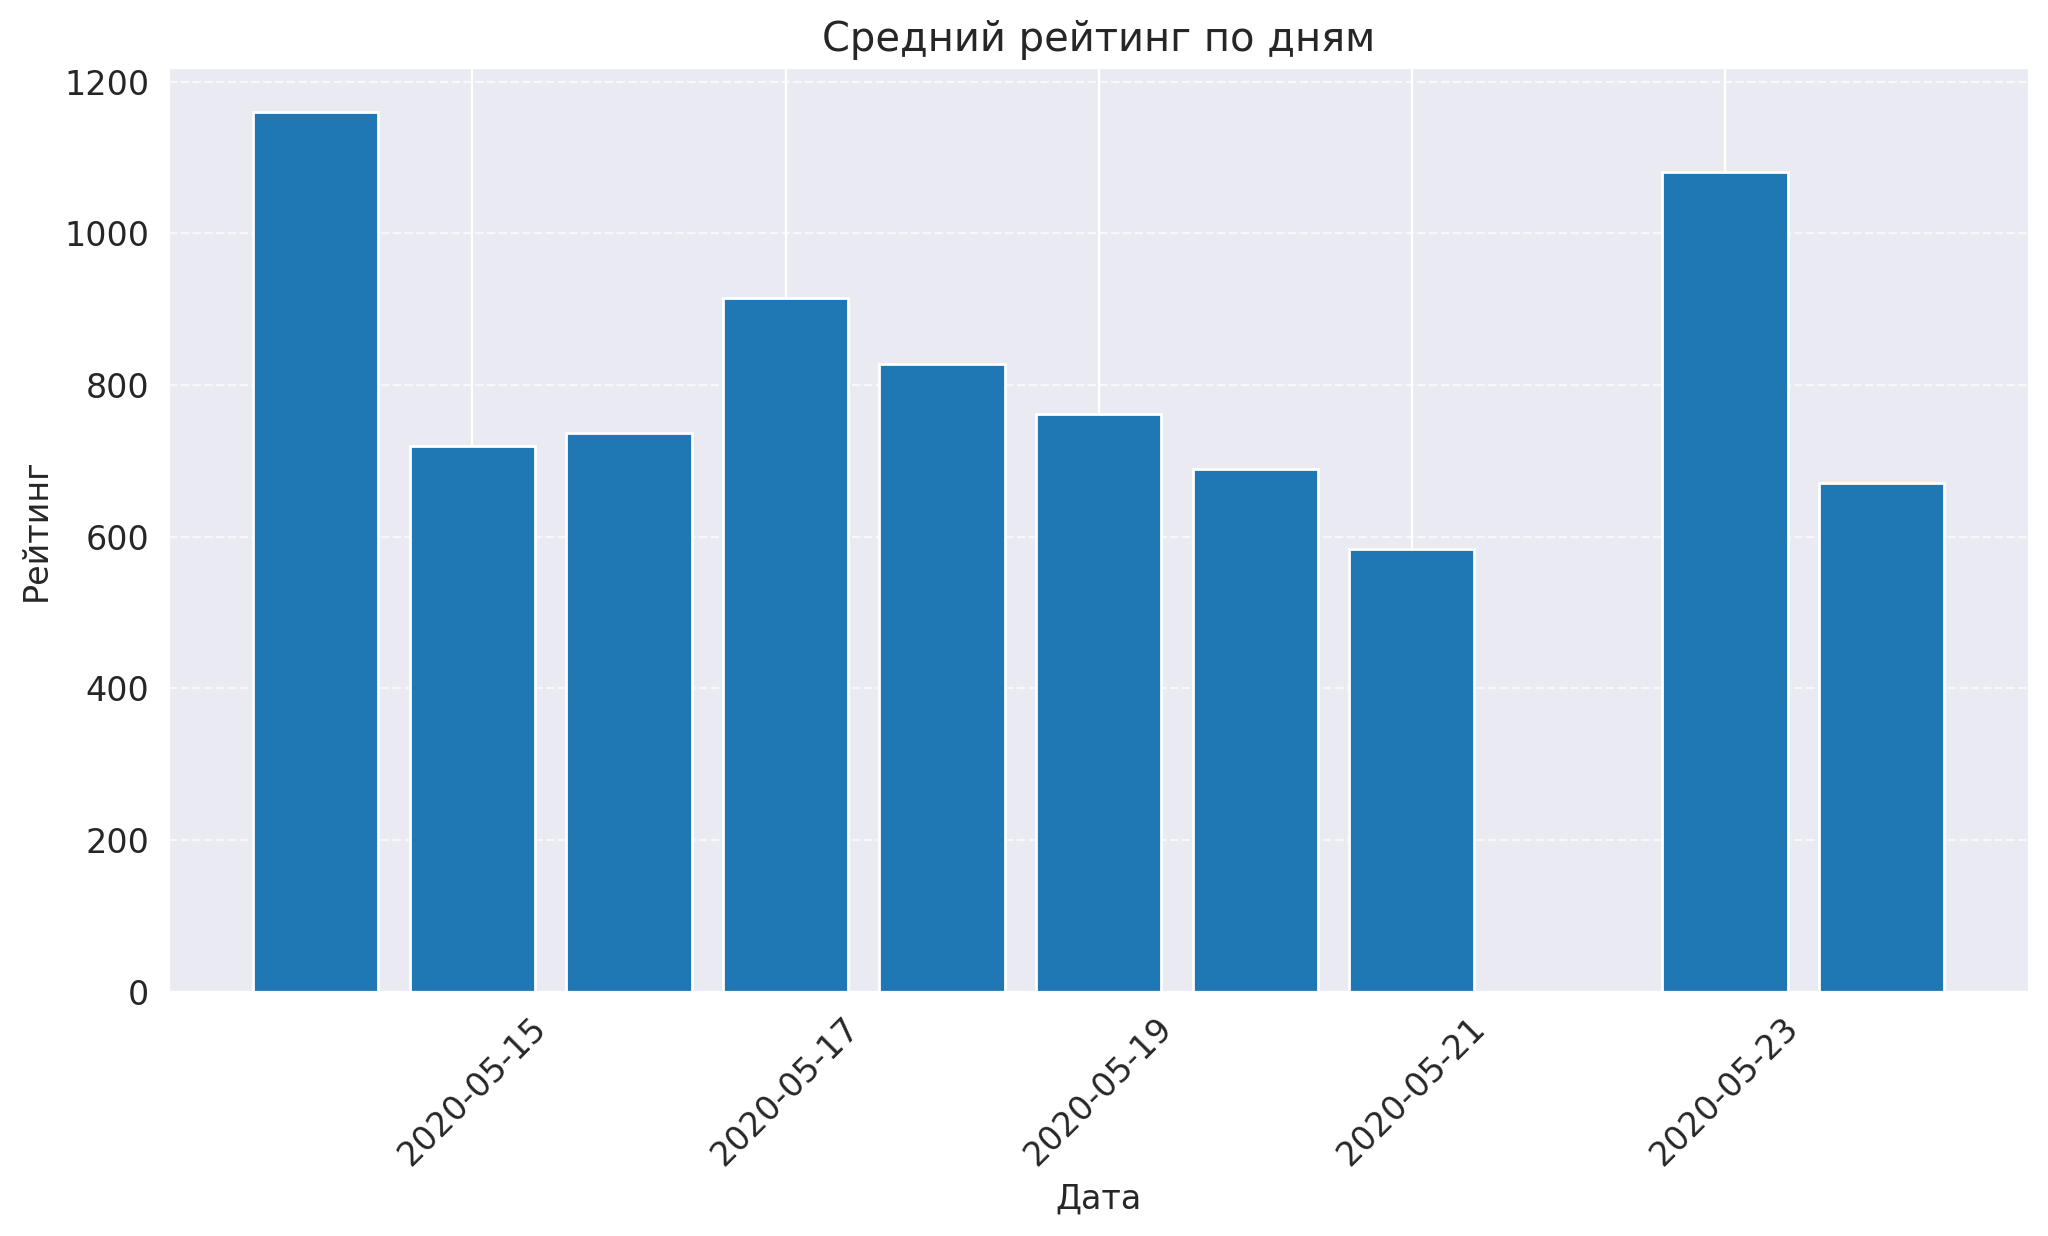

In [ ]:
# your code

import os

save_path = "/mnt/data/"
os.makedirs(save_path, exist_ok=True)

pdf_file = os.path.join(save_path, "rating.pdf")

plt.figure(figsize=(12, 6))
plt.bar(avg_rating.index, avg_rating.values)
plt.xlabel('Дата')
plt.ylabel('Рейтинг')
plt.title('Средний рейтинг по дням')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig(pdf_file, format='pdf')

pdf_file


### 2. Распределение студентов по курсам.

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [ ]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1.5 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [ ]:
import pandas as pd

df = df.copy()

df['fall_need'] = 1

df.loc[df['17_group'].isin([171, 172, 173]) | (df['is_mi'] == 1), 'fall_need'] = 2

df[['id', '17_group', '18_group', 'is_mi', 'fall_need']].head()


,id,17_group,18_group,is_mi,fall_need
217,7a21ef645ecb42198be493dd65320e78,NaN,188.0,NaN,1
340,d539461bf254cf8b3201cdf7990b119e,174.0,NaN,NaN,1
128,be4fa2120de3397ae21eac38ff0060e3,NaN,187.0,NaN,1
170,40b18d40197e3db66312a026e06b8ff1,NaN,188.0,NaN,1
359,79d14db48e4737af731960ae212d5134,172.0,NaN,NaN,2


Проверка:

In [ ]:
col_name = 'fall_need'

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [ ]:
import pandas as pd

# Копируем данные, чтобы не менять исходный df
df = df.copy()

# Добавляем колонки, если их нет
df['is_first_place'] = False
df['is_last_place'] = False

# Лимиты мест на курсах
limits = {
    'Statistical Learning Theory': 60,
    'Высокопроизводительные вычисления': 60,
    'Анализ неструктурированных данных': float('inf')  # Без ограничений
}
default_limit = 30  # Остальные курсы - 30 мест

# Словарь для записанных студентов
enrolled = {}

# Колонки с курсами
fall_courses = ['fall_1', 'fall_2']

# Сортируем студентов по перцентилю (чем выше, тем приоритетнее)
df = df.sort_values(by='percentile', ascending=False)

# Распределяем студентов по курсам
for _, student in df.iterrows():
    student_id = student['id']
    needed = student['fall_need']
    chosen = []

    for course_col in fall_courses:
        course = student[course_col]

        if pd.notna(course) and len(chosen) < needed:
            limit = limits.get(course, default_limit)

            if course not in enrolled:
                enrolled[course] = []

            if len(enrolled[course]) < limit:
                enrolled[course].append(student_id)
                chosen.append(course)

    # Записываем результат
    if len(chosen) == 1:
        df.loc[df['id'] == student_id, ['course1', 'course2']] = [chosen[0], "-"]
    elif len(chosen) == 2:
        df.loc[df['id'] == student_id, ['course1', 'course2']] = chosen
    else:
        df.loc[df['id'] == student_id, ['course1', 'course2']] = ["???", "???"]

# Определяем лучших и худших студентов на каждом курсе
for course in df[['course1', 'course2']].values.flatten():
    if pd.notna(course) and course != "???":
        students = df[(df['course1'] == course) | (df['course2'] == course)]

        if not students.empty:
            max_p = students['percentile'].max()
            min_p = students['percentile'].min()

            df.loc[(df['percentile'] == max_p) & ((df['course1'] == course) | (df['course2'] == course)), 'is_first_place'] = True
            df.loc[(df['percentile'] == min_p) & ((df['course1'] == course) | (df['course2'] == course)), 'is_last_place'] = True

# Итоговая таблица
res = df[['id', 'course1', 'course2', 'is_first_place', 'is_last_place']]

# Сохраняем в файл
res.to_csv("/mnt/data/res_fall.csv", index=False)

# Выводим ссылку на скачивание
"/mnt/data/res_fall.csv"


'/mnt/data/res_fall.csv'

Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [ ]:
df_sorted = df.sort_values('id')
df_sorted.to_csv("/mnt/data/sorted_data.csv", index=False)

"/mnt/data/sorted_data.csv"


'/mnt/data/sorted_data.csv'

In [ ]:
!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('2_task_check.csv')
print(check_df.head())

                 timestamp                                id  rating  \
0  2020-05-15 01:12:50.543  93ff79a51cd602f1dd3028ba2c129503     698   
1  2020-05-15 02:46:48.066  26b01b1c4cd5656bab18d24c548834fb     647   
2  2020-05-15 03:12:41.480  30f3653fc176d54e89ac3179c455c6dd     624   
3  2020-05-15 04:43:08.994  1528f0eaa027580820ccf0d92a53ad68     579   
4  2020-05-15 07:47:17.197  496ea4f0d4abe264b1bb1b80eb3830c5     572   

   18_group  is_mi                             fall_1  \
0     181.0    0.0                           Язык SQL   
1     181.0    0.0  Высокопроизводительные вычисления   
2     185.0    0.0   Безопасность компьютерных систем   
3     182.0    0.0        Statistical Learning Theory   
4     183.0    0.0  Высокопроизводительные вычисления   

                              fall_2                         fall_3  \
0  Высокопроизводительные вычисления           Матричные вычисления   
1   Безопасность компьютерных систем                       Язык SQL   
2          

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [ ]:
df = pd.read_csv('/mnt/data/2_task_check.csv').sort_values('id')

df.to_csv("/mnt/data/sorted_data.csv", index=False)

"/mnt/data/sorted_data.csv"


'/mnt/data/sorted_data.csv'

In [ ]:
fir_col_name = 'is_first_place'      # insert name of your new column with is_first_place as str
last_col_name = 'is_last_place'     # insert name of your new column with is_last_place as str


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [ ]:
import pandas as pd

df = pd.read_excel('/content/end_seminar.xlsx')

df.columns = df.columns.str.strip()

df['fall_need'] = df.apply(lambda x: 2 if str(x['17_group'])[:3] in ['171', '172', '173'] or x['is_mi'] == 1 else 1, axis=1)

limits = {
    'Statistical Learning Theory': 60,
    'Высокопроизводительные вычисления': 60,
    'Анализ неструктурированных данных': float('inf')
}
default_limit = 30

enrolled = {}

fall_courses = ['fall_1', 'fall_2', 'fall_3']

df = df.sort_values(by='percentile', ascending=False)

for _, student in df.iterrows():
    student_id = student['id']
    need = student['fall_need']
    chosen = []

    for course_col in fall_courses:
        course = student[course_col]

        if pd.notna(course) and len(chosen) < need:
            limit = limits.get(course, default_limit)

            if course not in enrolled:
                enrolled[course] = []

            if len(enrolled[course]) < limit:
                enrolled[course].append(student_id)
                chosen.append(course)


    if len(chosen) == 1:
        df.loc[df['id'] == student_id, ['course1', 'course2']] = [chosen[0], "-"]
    elif len(chosen) == 2:
        df.loc[df['id'] == student_id, ['course1', 'course2']] = chosen
    else:
        df.loc[df['id'] == student_id, ['course1', 'course2']] = ["???", "???"]


df[['id', 'course1', 'course2']].to_csv("/mnt/data/res_fall.csv", index=False)


from IPython.display import display
display(df[['id', 'course1', 'course2']].head())

from google.colab import files

files.download("/mnt/data/res_fall.csv")


,id,course1,course2
217,7a21ef645ecb42198be493dd65320e78,Принятие решений в условиях риска и неопределё...,-
340,d539461bf254cf8b3201cdf7990b119e,Анализ неструктурированных данных,-
128,be4fa2120de3397ae21eac38ff0060e3,Безопасность компьютерных систем,-
170,40b18d40197e3db66312a026e06b8ff1,Безопасность компьютерных систем,-
359,79d14db48e4737af731960ae212d5134,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv к форме.

Вставьте картинку, описывающую ваш опыт выполнения этого задания:

In [ ]:
УЖАС УЖАСНЫЙ ПРЕУЖАСНЫЙ!!!!